In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [2]:
path = Path("C:/Users/vaibhav semwal/Desktop/gnf d/UTKFace/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [3]:
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [4]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [5]:
image_path

['23_1_2_20170116172910708.jpg.chip.jpg',
 '28_0_1_20170113150719161.jpg.chip.jpg',
 '26_1_0_20170116234741431.jpg.chip.jpg',
 '37_0_3_20170119202516470.jpg.chip.jpg',
 '60_0_0_20170109013457906.jpg.chip.jpg',
 '2_0_2_20161219162359990.jpg.chip.jpg',
 '8_0_0_20170110222913531.jpg.chip.jpg',
 '34_1_4_20170113011428472.jpg.chip.jpg',
 '48_1_0_20170109220544479.jpg.chip.jpg',
 '54_0_0_20170113210319475.jpg.chip.jpg',
 '63_0_0_20170113210318902.jpg.chip.jpg',
 '35_1_1_20170113001239705.jpg.chip.jpg',
 '9_1_0_20170109202813775.jpg.chip.jpg',
 '29_1_1_20170116171830504.jpg.chip.jpg',
 '56_1_0_20170103180406295.jpg.chip.jpg',
 '35_0_3_20170119201257884.jpg.chip.jpg',
 '5_0_0_20170109193414770.jpg.chip.jpg',
 '1_0_2_20161219203256078.jpg.chip.jpg',
 '14_0_3_20170104225721488.jpg.chip.jpg',
 '27_0_0_20170113210319553.jpg.chip.jpg',
 '61_1_0_20170117192059259.jpg.chip.jpg',
 '27_0_0_20170117175751139.jpg.chip.jpg',
 '34_0_4_20170105161411273.jpg.chip.jpg',
 '35_0_0_20170117204518056.jpg.chip.jpg

In [6]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [7]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [8]:
gender_dict = {0:"Male",1:"Female"}

In [9]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [10]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


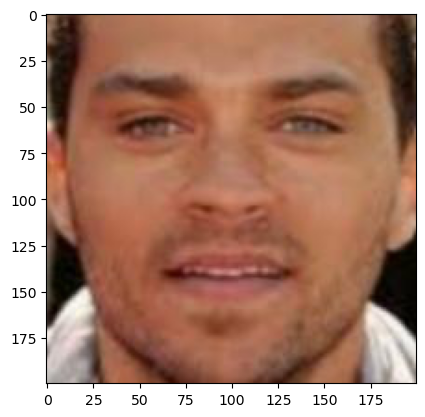

In [11]:
img = Image.open("C:/Users/vaibhav semwal/Desktop/gnf d/UTKFace/"+df.image[1])
plt.imshow(img)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

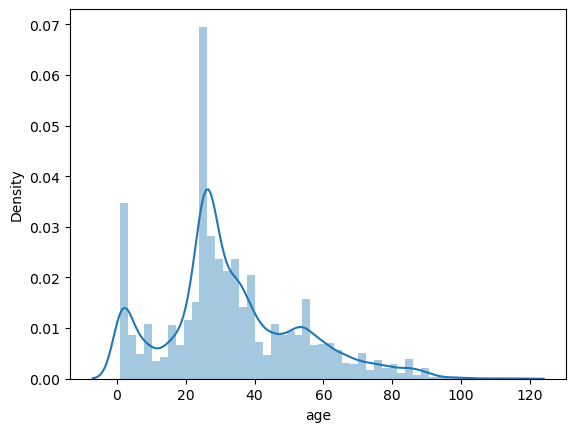

In [12]:
sns.distplot(df.age)

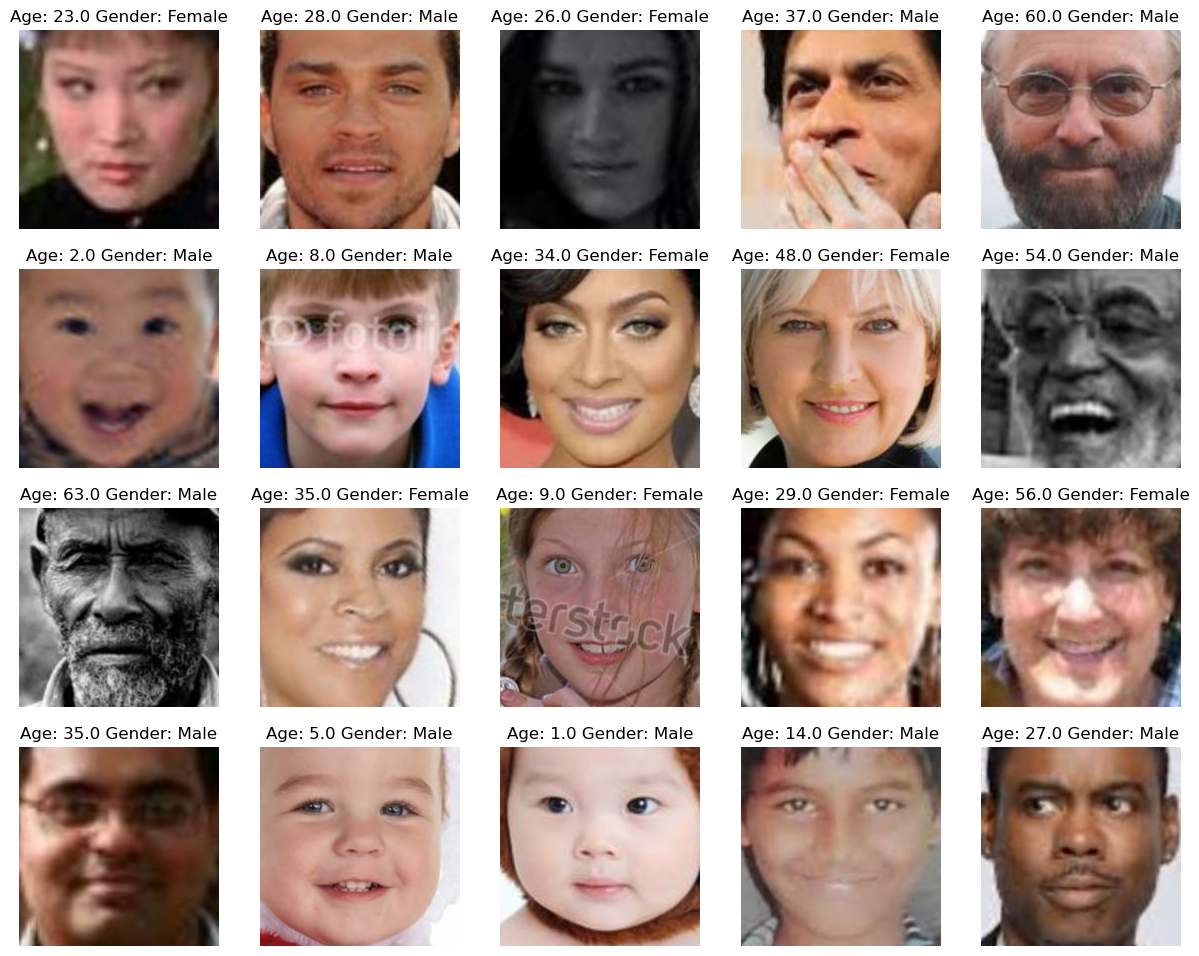

In [13]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("C:/Users/vaibhav semwal/Desktop/gnf d/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [14]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [15]:
train.head()

,image,age,gender
18199,78_1_1_20170113011857601.jpg.chip.jpg,78.0,1
19557,24_0_2_20170103223924087.jpg.chip.jpg,24.0,0
20132,34_1_3_20170119152405425.jpg.chip.jpg,34.0,1
11849,46_0_3_20170119183135878.jpg.chip.jpg,46.0,0
2100,30_0_2_20170116174814595.jpg.chip.jpg,30.0,0


In [16]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("C:/Users/vaibhav semwal/Desktop/gnf d/UTKFace/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

C:\anaconda\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\vaibhav semwal\AppData\Local\Temp\ipykernel_22392\1523509615.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [17]:
x_train.shape

(3556, 128, 128, 1)

In [18]:
x_train = x_train/255

In [19]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [20]:
input_size = (128,128,1)

In [21]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])


In [22]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [24]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
320/320 [==============================] - 163s 500ms/step - loss: 16.0581 - gender_output_loss: 0.6678 - age_output_loss: 15.3903 - gender_output_accuracy: 0.6594 - age_output_accuracy: 0.0491 - val_loss: 21.5624 - val_gender_output_loss: 0.6331 - val_age_output_loss: 20.9293 - val_gender_output_accuracy: 0.7444 - val_age_output_accuracy: 0.0478
Epoch 2/20
320/320 [==============================] - 138s 430ms/step - loss: 13.6082 - gender_output_loss: 0.4972 - age_output_loss: 13.1109 - gender_output_accuracy: 0.7597 - age_output_accuracy: 0.0450 - val_loss: 17.8435 - val_gender_output_loss: 0.4887 - val_age_output_loss: 17.3549 - val_gender_output_accuracy: 0.7837 - val_age_output_accuracy: 0.0534
Epoch 3/20
320/320 [==============================] - 139s 434ms/step - loss: 11.6125 - gender_output_loss: 0.4402 - age_output_loss: 11.1723 - gender_output_accuracy: 0.7950 - age_output_accuracy: 0.0469 - val_loss: 15.3947 - val_gender_output_loss: 0.4444 - val_age_output_loss:

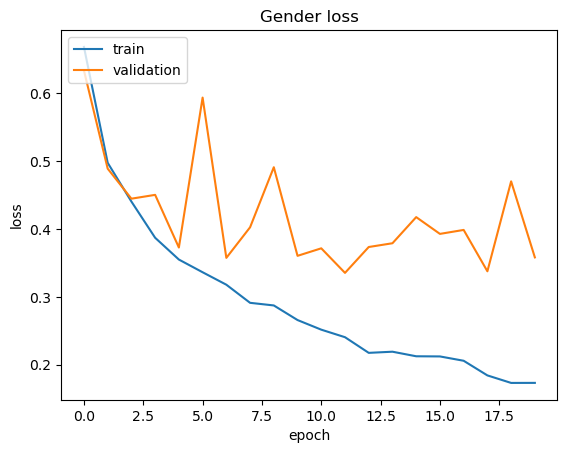

In [25]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

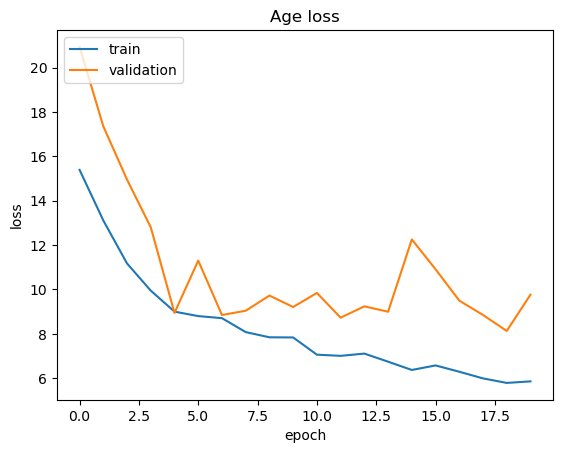

In [26]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Male  Age =  35.0
1/1 [==============================] - 0s 209ms/step
Prediction: Gender =  Male  Age =  30


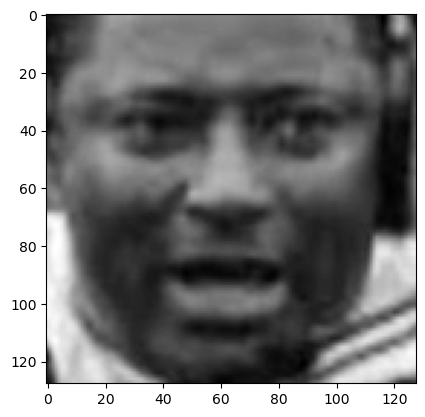

In [27]:
index=50
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  35.0
1/1 [==============================] - 0s 26ms/step
Prediction: Gender =  Male  Age =  38


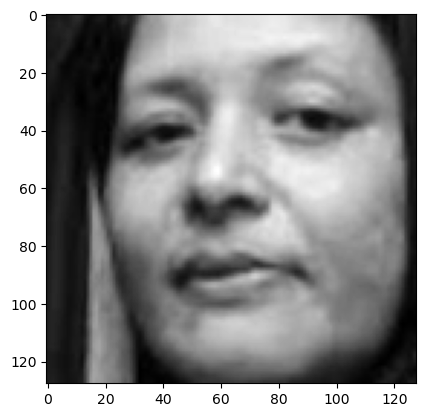

In [28]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')